## Regressão Linear Teoria

### 1. Regressão Linear Simples
- Formula: <b>y = ax + b</b>

| Coeficientes | Description |
| ----------- | ----------- |
| a | inclinação da reta (slope) |
| b | interceptação da reta (intercept) |
| y | variável alvo/dependente (target)  |
| x | variável independente (feature)|

<p> Como escolher <b>a</b> e <b>b</b> ? <br>
Escolhendo uma função de erro que minimize os erros. <b>(error Function = loss function = cost function)</b
</p>

<p> <b>Residuos</b>: Para cada observação, há residuos que é a diferença entre o ponto de dado real e o ponto de dado do modelo linear  </p>

| variável | Description |
| ----------- | ----------- |
| y | Valor Real Observado (coodenadas X e y) |
| y^ | Valor da Reta em relação ao Valor Real |


![alt ols](./imagens/rss.png)


### 2. Regressão Linear Simples Multipla
- Formula: <b>y = a1*x1 + a2*x2 ... + b</b>

<p>Basicamente os são descobertos os coeficientes que melhor se adapta a formula da regressão. A diferença é que temos um intercept(a) para cada feature(X), como mostrado na formula acima.</p>

### Avaliação do Modelo de Regressão
* R-squared(R²): quantifica a variancia em Y(Target) explicada pelos valores X (Features). Os valores variam de [0,1], quanto mais próximo de 1 melhor.

* Mean Squared Error(MSE): é medido pelas unidades da variável Y(Target), ao quadrado. 
<center>

MSE = $\frac{1}{n} \Sigma_{i=1}^n({y}-\hat{y})^2$
</center>
<br>

* Root Mean Squared Error(RMSE): É medido nas mesmas unidades da variavel Y(Target), basicamente é a raiz quadrada do MSE
<center>

RMSE = $\sqrt{MSE}$
</center>

## Regressão Linear Simples

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


#Carregando dataset
sales_df = pd.read_csv("./dados/advertising_and_sales_clean.csv")


print("DF PADRÃO")
display(sales_df.head())

#Selecionando Variavel Independente Radio -> Vendas com publicidade em Radio
X = sales_df["radio"].values.reshape(-1, 1)

#Selecionando Variavel Target sales
y = sales_df["sales"].values

# Criando Modelo
reg = LinearRegression()

#Treinando Modelo
reg.fit(X, y)

#Realizando Previsoes 
predictions = reg.predict(X)

#Adicionando colunas predictions_sales
sales_df["predictions_sales"] = predictions

print("DF COM PREVISOES")
display(sales_df.head())

DF PADRÃO


,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


DF COM PREVISOES


,tv,radio,social_media,influencer,sales,predictions_sales
0,16000.0,6566.23,2907.98,Mega,54732.76,95491.171191
1,13000.0,9237.76,2409.57,Mega,46677.90,117829.510384
2,41000.0,15886.45,2913.41,Mega,150177.83,173423.380715
3,83000.0,30020.03,6922.30,Mega,298246.34,291603.114442
4,15000.0,8437.41,1406.00,Micro,56594.18,111137.281671


## Visualizando a linha do Modelo

Text(0, 0.5, 'Sales ($)')

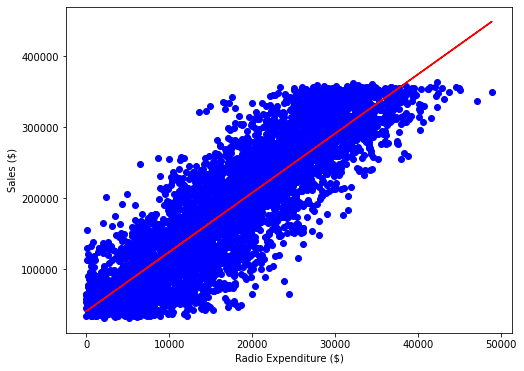

In [6]:
#Ajustando tamanho da figura
plt.figure(figsize=(8, 6))

#Criando Scatter Plot 
plt.scatter(X, y, color="blue")

#Criando Linha de Regressao
plt.plot(X, predictions, color="red")

#Adicionado Legendas nos Eixos
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

## Regressão Linear Multipla

In [38]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt


# Criando DF
sales_df = pd.read_csv("./dados/advertising_and_sales_clean.csv")

print("DF PADRÃO")
display(sales_df.head())

# Selecionando Variaveis Independente Radio, todas exceto sales
X = sales_df.drop(["sales", "influencer"], axis=1).values

# Selecionando Variavel Target sales
y = sales_df["sales"].values

# Dividindo dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Criando Modelo
reg = LinearRegression()

# Treinando Modelo com dados de Treino
reg.fit(X_train, y_train)

# Realizando Previsoes com dados de Teste
predictions = reg.predict(X_test)

print("DF COM PREVISOES")
df_previsoes = pd.DataFrame({"y_test": y_test,
                             "predictions": predictions,
                             "diff": abs(y_test-predictions)})

display(df_previsoes.head())


print("#"*25, "Metricas", "#"*25)
#Calculando R-squared
r_squared = reg.score(X_test, y_test)
print("R-squared", r_squared, "\n")

#Calculando RSME
rsme = mean_squared_error(y_test, df_previsoes["predictions"], squared=False)
print("RSME:",rsme, "\n")
print("#"*50, "\n")

DF PADRÃO


,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


DF COM PREVISOES


,y_test,predictions,diff
0,55261.28,53176.661542,2084.618458
1,67574.90,70996.198732,3421.298732
2,272250.11,267032.641321,5217.468679
3,195102.18,195731.024386,628.844386
4,273960.38,274005.600259,45.220259


######################### Metricas #########################
R-squared 0.9990152104759368 

RSME: 2944.4331996001015 

################################################## 



## Regressão Linear Multipla com Cross-Validation

<p>Cross-validation é uma das melhores abordagem para avaliar um modelo. Ele maxima a quantidade de dados para o modelo, pois na verdade ele divide os dados em partes(folders) treinando e testando para <b> cada k-folder </b>. Caso usamos um k-folder no valor de 6 como no exemplo abaixo, receberiamos 6 metricas. </p>

In [45]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt


# Criando DF
sales_df = pd.read_csv("./dados/advertising_and_sales_clean.csv")

print("DF PADRÃO")
display(sales_df.head())

# Criando KFolder Object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

# Selecionando Variaveis Independente Radio, todas exceto sales
X = sales_df.drop(["sales", "influencer"], axis=1).values

# Selecionando Variavel Target sales
y = sales_df["sales"].values

# Criando Modelo
reg = LinearRegression()

# Computando 6 Folds cross-validation scores
cv_scores = cross_val_score(reg, X, y, cv=kf)

#Print scores
print("#"*25, "Metricas Cross Validation", "#"*25, "\n")

print("Media", np.mean(cv_scores), "\n")
print("Desvio Padrão", np.std(cv_scores), "\n")
print("Intervalo de Confiança de 95%", np.quantile(cv_scores, [0.025, 0.975]), "\n")

print("#"*50)


DF PADRÃO


,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


######################### Metricas Cross Validation ######################### 

Media 0.9989896443678249 

Desvio Padrão 6.608118371529651e-05 

Intervalo de Confiança de 95% [0.99889767 0.99908583] 

##################################################


## Regressão com Regularização <b>Ridge</b>

* É Escolhido um coefficiente, a, para cada variável x(feature).
* Regularização: Penaliza coeficientes com valores altos.

<p> 

Loss Function = OLS loss function + α * $\frac{1}{n} \Sigma_{i=1}^nai^2$

| variável | Description |
| ----------- | ----------- |
| α (alpha) | controla a complexidade do modelo, quanto menor menos complexo, quanto maior mais complexo |
| ai | intercept das variaveis x (features) |

</p>

In [52]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


# Criando DF
sales_df = pd.read_csv("./dados/advertising_and_sales_clean.csv")

print("DF PADRÃO")
display(sales_df.head())

# Selecionando Variaveis Independente Radio, todas exceto sales
X = sales_df.drop(["sales", "influencer"], axis=1).values

# Selecionando Variavel Target sales
y = sales_df["sales"].values

# Dividindo dados em Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

#Criando modelo com diferentes valores de alpha e calculando o R-squared
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train, y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test, y_test)
  ridge_scores.append(score)
print(ridge_scores)

display("""As pontuações não parecem mudar muito à medida que o alfa aumenta, o que é indicativo de quão bem as features(X) explicam a variação na variável target(y) - mesmo penalizando fortemente os grandes coeficientes, o underfitting não ocorre!""")


DF PADRÃO


,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


'As pontuações não parecem mudar muito à medida que o alfa aumenta, o que é indicativo de quão bem as features(X) explicam a variação na variável target(y) - mesmo penalizando fortemente os grandes coeficientes, o underfitting não ocorre!'

## Regressão com Regularização <b>Lasso</b>

<p>A Regressão com Regularização Lasso, pode ser util para seleção de atributos que mais impacta um modelo, veremos no exemplo a seguir.</p>

* É Escolhido um coefficiente, a, para cada variável x(feature).
* Regularização: Penaliza coeficientes com valores altos.

<p> 

Loss Function = OLS loss function + α * $\frac{1}{n} \Sigma_{i=1}^n|ai|$

| variável | Description |
| ----------- | ----------- |
| α (alpha) | controla a complexidade do modelo, quanto menor menos complexo, quanto maior mais complexo |
| ai | intercept das variaveis x (features) |

</p>

DF PADRÃO


,tv,radio,social_media,influencer,sales
0,16000.0,6566.23,2907.98,Mega,54732.76
1,13000.0,9237.76,2409.57,Mega,46677.90
2,41000.0,15886.45,2913.41,Mega,150177.83
3,83000.0,30020.03,6922.30,Mega,298246.34
4,15000.0,8437.41,1406.00,Micro,56594.18


[ 3.56256962 -0.00397035  0.00496385]


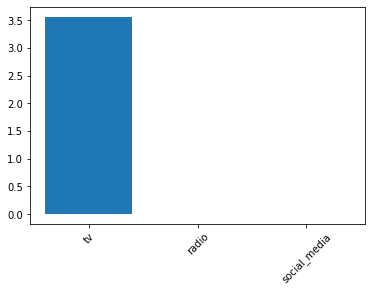

'Gastos com publicidade na TV é a feature(X) mais importante no conjunto de dados para prever os valores de vendas!'

In [56]:
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


# Criando DF
sales_df = pd.read_csv("./dados/advertising_and_sales_clean.csv")

print("DF PADRÃO")
display(sales_df.head())

#Selecionando nomes das colunas usadas em X
sales_columns = sales_df.drop(["sales", "influencer"], axis=1).columns

# Selecionando Variaveis Independente Radio, todas exceto sales
X = sales_df.drop(["sales", "influencer"], axis=1).values

# Selecionando Variavel Target sales
y = sales_df["sales"].values

# Criando Modelo
lasso = Lasso(alpha=0.3)

# Treinando Modelo
lasso.fit(X, y)

# Calculando e imprimindo os coeficientes
lasso_coef = lasso.coef_
print(lasso_coef)

#Plotando atributos mais importantes pro modelo
plt.bar(sales_columns, lasso_coef)
plt.xticks(rotation=45)
plt.show()

display("Gastos com publicidade na TV é a feature(X) mais importante no conjunto de dados para prever os valores de vendas!")